<a href="https://colab.research.google.com/github/etsubeta132/Ethiopian-Food-Recomender/blob/main/recipe_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 importing libraries


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split

data preprocessing

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/food_Ingredients.zip'
# !ls '/content/drive/MyDrive/'


Archive:  /content/drive/MyDrive/Colab Notebooks/food_Ingredients.zip
   creating: Ingredients/
   creating: Ingredients/apple/
  inflating: Ingredients/apple/apple_1.jpg  
  inflating: Ingredients/apple/apple_2.jpg  
  inflating: Ingredients/apple/apple_3.jpg  
  inflating: Ingredients/apple/apple_4.jpg  
  inflating: Ingredients/apple/apple_5.jpg  
  inflating: Ingredients/apple/apple_13.jpg  
  inflating: Ingredients/apple/apple_14.jpg  
  inflating: Ingredients/apple/apple_15.jpg  
  inflating: Ingredients/apple/apple_16.jpg  
  inflating: Ingredients/apple/apple_8.JPG  
  inflating: Ingredients/apple/apple_17.jpg  
  inflating: Ingredients/apple/apple_18.jpg  
  inflating: Ingredients/apple/apple_19.jpg  
  inflating: Ingredients/apple/apple_20.jpg  
  inflating: Ingredients/apple/apple_21.jpg  
  inflating: Ingredients/apple/apple_22.jpg  
  inflating: Ingredients/apple/apple_23.jpg  
  inflating: Ingredients/apple/apple_24.jpg  
  inflating: Ingredients/apple/apple_9.jpg  
  inf

In [ ]:
# os.system('rm -rf /content/output/*')

In [ ]:
from PIL import Image
import os

# Set the path to your ingredients folder
ingredients_folder = '/content/Ingredients'  # Change this path accordingly

# Set the path to the output folder
output_folder = '/content/output'

# Iterate through each subfolder in the ingredients folder
for subfolder in os.listdir(ingredients_folder):
    subfolder_path = os.path.join(ingredients_folder, subfolder)

    # List all images in the subfolder
    images = [img for img in os.listdir(subfolder_path) if img.endswith((".png", ".jpg"))]

    if len(images) == 0:
        print(f"No images in {subfolder}. Skipping...")
        continue

    # Create subfolders within the output folder
    output_subfolder = os.path.join(output_folder, subfolder)
    os.makedirs(output_subfolder, exist_ok=True)

    # Process each image in the subfolder
    for img in images:
        src_path = os.path.join(subfolder_path, img)
        dest_path = os.path.join(output_subfolder, img)

        try:
            # Open and convert the image to PNG format
            with Image.open(src_path) as image:
                image = Image.open(src_path)
                image.convert('RGB').save('image.jpeg')

        except Exception as e:
            print(f"Error processing {img}: {str(e)}")

print("Image decoding and conversion completed.")


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Image decoding and conversion completed.


In [ ]:
dataset_dir = '/content/Ingredients'
def convert_images_to_common_format(dataset_path, output_format):
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            output_path = os.path.splitext(file_path)[0] + "." + output_format.lower()

            if file_path.lower().endswith(('.jpg', '.jpeg', '.png')):
                try:
                    with Image.open(file_path) as img:
                        img.convert("RGB").save(output_path, format=output_format)
                except (IOError, SyntaxError) as e:
                    print(f"Error converting image: {file_path}")

output_format = "png"  # Desired output format, e.g., "jpeg", "png"
convert_images_to_common_format(dataset_dir, output_format)

In [ ]:
def remove_files_with_invalid_extension(dataset_path, valid_extension):
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            file_extension = os.path.splitext(file_path)[1]
            if file_extension.lower() != valid_extension.lower():
                print(f"Invalid file found: {file_path}")
                os.remove(file_path)  # Remove the invalid file

valid_extension = ".png"  # Valid file extension, e.g., ".png"
remove_files_with_invalid_extension(dataset_dir, valid_extension)

Invalid file found: /content/Ingredients/carrot/carrot_28.jpg
Invalid file found: /content/Ingredients/carrot/carrot_25.jpg
Invalid file found: /content/Ingredients/carrot/carrot_23.jpg
Invalid file found: /content/Ingredients/carrot/carrot_71.jpg
Invalid file found: /content/Ingredients/carrot/carrot_79.jpg
Invalid file found: /content/Ingredients/carrot/carrot_27.jpg
Invalid file found: /content/Ingredients/carrot/carrot_34.jpg
Invalid file found: /content/Ingredients/carrot/carrot_67.jpg
Invalid file found: /content/Ingredients/carrot/carrot_41.jpg
Invalid file found: /content/Ingredients/carrot/carrot_82.jpg
Invalid file found: /content/Ingredients/carrot/carrot_35.jpg
Invalid file found: /content/Ingredients/carrot/carrot_6.jpg
Invalid file found: /content/Ingredients/carrot/carrot_21.jpg
Invalid file found: /content/Ingredients/carrot/carrot_45.jpg
Invalid file found: /content/Ingredients/carrot/carrot_14.jpg
Invalid file found: /content/Ingredients/carrot/carrot_37.jpg
Invalid f

In [ ]:
# os.system('rm -rf /content/output/*')

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the path to your ingredients folder
ingredients_folder = '/content/Ingredients'  # Change this path accordingly

# Set the path to the output folder
output_folder = '/content/recipe'

# Create output folders for train, test, and validation
train_folder = os.path.join(output_folder, 'train')
test_folder = os.path.join(output_folder, 'test')
validation_folder = os.path.join(output_folder, 'validation')

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(validation_folder, exist_ok=True)

# Iterate through each subfolder in the ingredients folder
for subfolder in os.listdir(ingredients_folder):
    subfolder_path = os.path.join(ingredients_folder, subfolder)

    # List all images in the subfolder
    images = [img for img in os.listdir(subfolder_path) if img.endswith((".png"))]

    if len(images) == 0:
        print(f"No images in {subfolder}. Skipping...")
        continue

    # Create subfolders within train, test, and validation folders
    train_subfolder = os.path.join(train_folder, subfolder)
    test_subfolder = os.path.join(test_folder, subfolder)
    validation_subfolder = os.path.join(validation_folder, subfolder)

    os.makedirs(train_subfolder, exist_ok=True)
    os.makedirs(test_subfolder, exist_ok=True)
    os.makedirs(validation_subfolder, exist_ok=True)

    # Split the images into train, test, and validation sets
    train_images, test_validation_images = train_test_split(images, test_size=0.2, train_size=0.8, random_state=42)
    test_images, validation_images = train_test_split(test_validation_images, test_size=0.5, train_size=0.5, random_state=42)

    # Copy all images to the training set
    for img in train_images:
        src_path = os.path.join(subfolder_path, img)
        dest_path = os.path.join(train_subfolder, img)
        shutil.copy(src_path, dest_path)

    # Copy some images to the test set
    for img in test_images:
        src_path = os.path.join(subfolder_path, img)
        dest_path = os.path.join(test_subfolder, img)
        shutil.copy(src_path, dest_path)

    # Copy some images to the validation set
    for img in validation_images:
        src_path = os.path.join(subfolder_path, img)
        dest_path = os.path.join(validation_subfolder, img)
        shutil.copy(src_path, dest_path)

print("Data splitting and copying completed.")


Data splitting and copying completed.


In [ ]:

training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/recipe/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/recipe/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

***Building a model***

In [ ]:
cnn = tf.keras.models.Sequential()

## Buiulding a convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:

cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:

cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:

cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:

cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:

#Output Layer
cnn.add(tf.keras.layers.Dense(units=45,activation='softmax'))

### Compiling and Training Phase

# New Section

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
81/81 [==============================] - 198s 2s/step - loss: 6.8890 - accuracy: 0.0394 - val_loss: 3.7895 - val_accuracy: 0.0519
Epoch 2/32
81/81 [==============================] - 184s 2s/step - loss: 3.7665 - accuracy: 0.0468 - val_loss: 3.7439 - val_accuracy: 0.0519
Epoch 3/32
81/81 [==============================] - 183s 2s/step - loss: 3.7313 - accuracy: 0.0534 - val_loss: 3.7282 - val_accuracy: 0.0519
Epoch 4/32
81/81 [==============================] - 189s 2s/step - loss: 3.7198 - accuracy: 0.0530 - val_loss: 3.7208 - val_accuracy: 0.0576
Epoch 5/32
81/81 [==============================] - 183s 2s/step - loss: 3.7116 - accuracy: 0.0534 - val_loss: 3.6970 - val_accuracy: 0.0605
Epoch 6/32
81/81 [==============================] - 176s 2s/step - loss: 3.6963 - accuracy: 0.0619 - val_loss: 3.7036 - val_accuracy: 0.0605
Epoch 7/32
81/81 [==============================] - 182s 2s/step - loss: 3.6841 - accuracy: 0.0626 - val_loss: 3.7088 - val_accuracy: 0.0634
Epoch 8/32
81

In [ ]:

#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

81/81 [==============================] - 146s 2s/step - loss: 1.0635 - accuracy: 0.7243
Training accuracy: 0.7242845892906189


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


11/11 [==============================] - 22s 351ms/step - loss: 4.9039 - accuracy: 0.1758
Validation accuracy: 0.17579250037670135


In [ ]:

cnn.save('trained_model.h5')

In [ ]:
training_history.history #Return Dictionary of history

{'loss': [6.889041900634766,
  3.7665460109710693,
  3.731315851211548,
  3.7197532653808594,
  3.7116217613220215,
  3.6962690353393555,
  3.6840717792510986,
  3.6709184646606445,
  3.6668829917907715,
  3.5819218158721924,
  3.477365255355835,
  3.388254165649414,
  3.2485883235931396,
  3.143754005432129,
  3.0100080966949463,
  2.906384229660034,
  2.739947557449341,
  2.6857547760009766,
  2.547393560409546,
  2.447429656982422,
  2.3945345878601074,
  2.269120931625366,
  2.1393799781799316,
  2.064517021179199,
  1.9778778553009033,
  1.9487957954406738,
  1.8701269626617432,
  1.7485548257827759,
  1.6844338178634644,
  1.6672524213790894,
  1.5577930212020874,
  1.5106277465820312],
 'accuracy': [0.03944315388798714,
  0.046790409833192825,
  0.05336426943540573,
  0.05297757312655449,
  0.05336426943540573,
  0.061871618032455444,
  0.06264501065015793,
  0.06651198863983154,
  0.06767208129167557,
  0.08546017110347748,
  0.11098220944404602,
  0.12142305076122284,
  0.1600

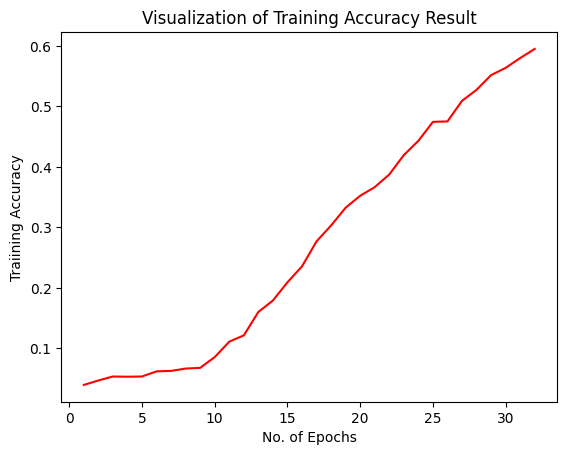

In [ ]:

epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

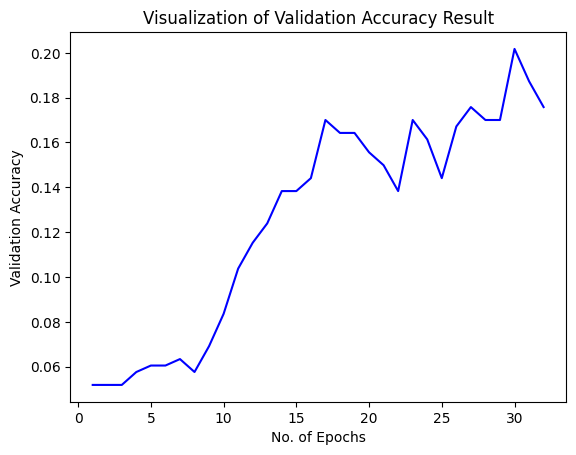

In [ ]:

plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/output/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

In [ ]:

test_loss,test_acc = cnn.evaluate(test_set)/
print('Test accuracy:', test_acc)

NameError: ignored

In [ ]:
import os
from PIL import Image, ImageEnhance, ImageOps
import numpy as np
import shutil
from sklearn.model_selection import train_test_split
import albumentations as A
import hashlib
import glob
import random

In [ ]:
dataset_dir = 'Ingredients'

In [ ]:



def is_image_file(filename):
    # Check if the file has an image extension
    image_extensions = ['.jpg', '.jpeg', '.png']
    return any(filename.lower().endswith(ext) for ext in image_extensions)

In [ ]:


def calculate_image_hash(file_path):
    # Calculate the MD5 hash value of the image file
    with open(file_path, 'rb') as f:
        image_data = f.read()
        image_hash = hashlib.md5(image_data).hexdigest()
    return image_hash

In [ ]:

def remove_duplicate_images(dataset_dir):
    # Create a dictionary to store the hash values of images
    image_hashes = {}

    # Iterate over the image files in the original dataset directory
    for filename in os.listdir(dataset_dir):
        file_path = os.path.join(dataset_dir, filename)

        # Check if the file is a directory
        if os.path.isdir(file_path):
            # Iterate over the image files in the subdirectory
            for image in os.listdir(file_path):
                image_path = os.path.join(file_path, image)
                if is_image_file(image_path):
                    # Calculate the hash value of the image file
                    image_hash = calculate_image_hash(image_path)

                    # Check if the hash value already exists in the dictionary
                    if image_hash in image_hashes:
                        # Remove the duplicate image file
                        os.remove(image_path)
                        print(f"Removed duplicate image: {image_path}")
                    else:
                        # Add the hash value to the dictionary
                        image_hashes[image_hash] = image_path

remove_duplicate_images(dataset_dir)

Removed duplicate image: Ingredients/carrot/carrot_5.png
Removed duplicate image: Ingredients/carrot/carrot_4.png
Removed duplicate image: Ingredients/carrot/carrot_78.png
Removed duplicate image: Ingredients/carrot/carrot_79.png
Removed duplicate image: Ingredients/carrot/carrot_6.png
Removed duplicate image: Ingredients/kosta/kosta_4.png
Removed duplicate image: Ingredients/kosta/kosta_2.png
Removed duplicate image: Ingredients/kosta/kosta_6.png
Removed duplicate image: Ingredients/kosta/kosta_95.png
Removed duplicate image: Ingredients/kosta/kosta_97.png
Removed duplicate image: Ingredients/kosta/kosta_3.png
Removed duplicate image: Ingredients/kosta/kosta_1.png
Removed duplicate image: Ingredients/mango/mango_82.png
Removed duplicate image: Ingredients/mango/mango_3.png
Removed duplicate image: Ingredients/mango/mango_5.png
Removed duplicate image: Ingredients/mango/mango_8.png
Removed duplicate image: Ingredients/mango/mango_86.png
Removed duplicate image: Ingredients/mango/mango_

In [ ]:

def check_and_remove_non_image_files(dataset_path):
    allowed_extensions = ['.jpg', '.jpeg', '.png']
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            file_extension = os.path.splitext(file_path)[1]
            if file_extension.lower() not in allowed_extensions:
                print(f"Non-image file found: {file_path}")
                os.remove(file_path)  # Remove the non-image file

check_and_remove_non_image_files(dataset_dir)

In [ ]:




def remove_irrelevant_images(dataset_path, min_image_size):
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    image_width, image_height = img.size
                    if image_width < min_image_size or image_height < min_image_size:
                        print(f"Low-quality image found: {file_path}")
                        os.remove(file_path)  # Remove the low-quality image
            except (IOError, SyntaxError) as e:
                print(f"Invalid image file found: {file_path}")
                os.remove(file_path)  # Remove the invalid image file

min_image_size = 64 # Minimum width or height of valid images
remove_irrelevant_images(dataset_dir, min_image_size)

In [ ]:


def convert_images_to_common_format(dataset_path, output_format):
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            output_path = os.path.splitext(file_path)[0] + "." + output_format.lower()

            if file_path.lower().endswith(('.jpg', '.jpeg', '.png')):
                try:
                    with Image.open(file_path) as img:
                        img.convert("RGB").save(output_path, format=output_format)
                except (IOError, SyntaxError) as e:
                    print(f"Error converting image: {file_path}")

output_format = "png"  # Desired output format, e.g., "jpeg", "png"
convert_images_to_common_format(dataset_dir, output_format)

In [ ]:
def remove_files_with_invalid_extension(dataset_path, valid_extension):
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            file_extension = os.path.splitext(file_path)[1]
            if file_extension.lower() != valid_extension.lower():
                print(f"Invalid file found: {file_path}")
                os.remove(file_path)  # Remove the invalid file

valid_extension = ".png"  # Valid file extension, e.g., ".png"
remove_files_with_invalid_extension(dataset_dir, valid_extension)

In [ ]:


def resize_images(dataset_path, target_size):
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    resized_img = img.resize(target_size)
                    resized_img.save(file_path)
            except (IOError, SyntaxError) as e:
                print(f"Error resizing image: {file_path}")

target_size = (260, 260)
resize_images(dataset_dir, target_size)

In [ ]:
def apply_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def apply_rotation(image, angle):
    return image.rotate(angle)

def apply_flip(image, horizontal=True, vertical=True):
    if horizontal and random.choice([True, False]):
        image = ImageOps.mirror(image)
    if vertical and random.choice([True, False]):
        image = ImageOps.flip(image)
    return image

def add_noise(image, noise_factor=0.1):
    img_array = np.array(image)
    row, col, _ = img_array.shape
    mean = 0
    var = 0.01
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col, 3))
    noisy = np.clip(img_array + gauss * 255, 0, 255)
    return Image.fromarray(noisy.astype(np.uint8))


# Iterate through each category folder in the dataset
for category_folder in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category_folder)

    # Ensure it is a directory
    if os.path.isdir(category_path):
        # Iterate through each image in the current category
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)

            # Load the image
            img = Image.open(image_path).convert("RGB")

            # Apply augmentation
            augmented_img = apply_brightness(img, random.uniform(0.6, 1.5))
            augmented_img = apply_rotation(augmented_img, random.uniform(-40, 40))
            augmented_img = apply_flip(augmented_img, horizontal=True, vertical=True)
            augmented_img.save(os.path.join(category_path, f'aug_{image_name}'))
            augmented_img = add_noise(augmented_img)

            # Save augmented images in the same folder as the original images
            augmented_img.save(os.path.join(category_path, f'aug_{image_name}'))


In [ ]:

# Get the list of subdirectories (categories)
categories = os.listdir(dataset_dir)

# Create a dictionary to store the mappings of category names to labels
label_map = {category: label for label, category in enumerate(categories)}

# Iterate over subdirectories
for subdir in categories:
    print(f"Processing subdirectory: {subdir}")

    # Get the path of the current subdirectory
    sub_dir_path = os.path.join(dataset_dir, subdir)

    # Check if the subdirectory is a directory
    if os.path.isdir(sub_dir_path):
        # Get the list of image files in the subdirectory
        image_files = os.listdir(sub_dir_path)
        c = 1

        # Iterate over the image files
        for image_file in image_files:
            # Get the path of the current image file
            image_path = os.path.join(sub_dir_path, image_file)
            # Perform the labeling by moving the image file to a new directory with the corresponding label
            label = label_map[subdir]
            new_image_path = os.path.join(dataset_dir, subdir, f'{subdir}_{c}.png')
            c += 1
            os.makedirs(os.path.dirname(new_image_path), exist_ok=True)
            os.rename(image_path, new_image_path)

In [ ]:

# Set the path to the directory where you want to create the training and testing directories
output_dir = 'output'

# Set the desired split ratio (e.g., 0.8 for 80% training and 20% testing)
train_ratio = 0.8

# Create the training and testing directories
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over the image files in the original dataset directory
for filename in os.listdir(dataset_dir):
    for image in os.listdir(os.path.join(dataset_dir, filename)):
        image_ext = os.path.splitext(image)[1].lower()  # Get the lowercase extension of the image file
        if image_ext.endswith('.png'):
            # Split the image to extract the ingredient name and image number
            parts = image.split('_')
            ingredient_name = parts[0]
            image_number = int(parts[1].split('.')[0])

            # Create the class directories in the training and testing directories
            train_class_dir = os.path.join(train_dir, ingredient_name)
            test_class_dir = os.path.join(test_dir, ingredient_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(test_class_dir, exist_ok=True)

            # Split the images into training and testing sets based on the image number
            if random.random() <= train_ratio:
                # Move the image to the training directory
                shutil.copy2(
                    os.path.join(dataset_dir, filename, image),
                    os.path.join(train_class_dir, image)
                )
            else:
                # Move the image to the testing directory
                shutil.copy2(
                    os.path.join(dataset_dir, filename, image),
                    os.path.join(test_class_dir, image)
                )

In [ ]:
train_data_dir = "output/train/"

# Iterate over the image files in the directory
for filename in os.listdir(train_data_dir):
    image_dir = os.path.join(train_data_dir,filename)
    for image in os.listdir(image_dir):
        print(image)
        if image.endswith('.png'):
            # Open the image
            image_path = os.path.join(image_dir, image)
            image = Image.open(image_path)
            print(image)

            # Resize the image
            resized_image = image.resize(target_size)

            # Save the resized image
            resized_image.save(image_path)

             # Normalize pixel values
            normalized_image = np.array(image) / 255.0

            # Convert the pixel values back to the range [0, 255]?
            normalized_image = (normalized_image * 255).astype(np.uint8)

            # Save the normalized image
            normalized_image = Image.fromarray(normalized_image)
            normalized_image.save(image_path)

In [ ]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50, MobileNetV2, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [ ]:
data = []

for root, dirs, files in os.walk("./Ingredients"):
    for directory in dirs:
        label = directory
        images = os.listdir(os.path.join(root, directory))
        for image in images:
            image_path = os.path.join(root, directory, image)
            data.append((image_path, label))

# Create a DataFrame
df = pd.DataFrame(data, columns=["Image", "Label"])
df.to_csv("annotations.csv", index=False)

In [ ]:


from sklearn.utils.class_weight import compute_class_weight
# Load your annotations.csv file
df = pd.read_csv("annotations.csv")


# Create a mapping from class names to integer labels
class_mapping = {class_name: str(label) for label, class_name in enumerate(df['Label'].unique())}
print(class_mapping)



# Map class names to string labels in the DataFrame
df['Label'] = df['Label'].map(class_mapping)

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


# Convert integer labels to one-hot encoding for training data
y_train_encoded = to_categorical(train_df['Label'], num_classes=24)

# Convert integer labels to one-hot encoding for testing data
y_test_encoded = to_categorical(test_df['Label'], num_classes=17)



# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training and testing data
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="Image",
    y_col="Label",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42,
    directory="./"
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col="Image",
    y_col="Label",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    seed=42,
    directory="./"
)

# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build your custom model on top of the ResNet50 base
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(25 ,activation='softmax'))


# Freeze the weights of the ResNet50 layers
base_model.trainable = False

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print some information about the generators
print("Number of batches in train generator:", len(train_generator))
print("Number of batches in test generator:", len(test_generator))
print("Number of samples in train generator:", train_generator.samples)
print("Number of samples in test generator:", test_generator.samples)


# Use class weights during model training
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('ingredient_classifier_model.h5')


In [ ]:
  # Visualize training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Make predictions on a sample test batch
sample_images, sample_labels = next(test_generator)
predictions = model.predict(sample_images)

# Print the predicted class indices and true class indices
predicted_classes = predictions.argmax(axis=1)
true_classes = sample_labels.argmax(axis=1)

print("Predicted classes:", predicted_classes)
print("True classes:", true_classes)

In [ ]:
print(df["Label"].unique())